import pandas!

In [27]:
import pandas as pd

Load all the dataframes

In [28]:
suppliers = pd.read_csv("./data/suppliers.csv")
demand = pd.read_csv("./data/demand_forecasts.csv")
recipes = pd.read_csv("./data/recipes.csv")

In [29]:
suppliers

,supp_id,ingredient_uuid,cost_per_unit,unit_name,country_of_origin,total_tax_per_unit,time_to_deliver
0,megacorp,cocoa,2500.0,tonne,ghana,14,12
1,megacorp,milk_powder,3200.0,tonne,france,12,3
2,megacorp,hazelnut,1918.0,tonne,turkey,12,4
3,megacorp,sugar,457.0,tonne,brazil,5,9
4,megacorp,vanilla,237.0,tonne,china,3,10
5,omni_inc,cocoa,2400.0,tonne,cote d'ivoire,14,12
6,omni_inc,milk_powder,3120.0,tonne,switzerland,0,2
7,omni_inc,hazelnut,1925.0,tonne,italy,12,3
8,omni_inc,sugar,465.0,tonne,india,5,12
9,omni_inc,vanilla,201.0,tonne,indonesia,3,12


In [30]:
demand

,rec_id,month,demand
0,1,jan,16443
1,1,feb,18943
2,1,mar,19727
3,1,apr,10368
4,1,may,15125
5,1,jun,18413
6,1,jul,17442
7,1,aug,19986
8,1,sep,15302
9,1,oct,13637


In [31]:
recipes

,rec_id,ingredient_uuid,cost_to_process,time_to_process,qty
0,1,cocoa,0.20,120,13
1,1,milk_powder,0.03,110,12
2,1,hazelnut,0.08,45,4
3,1,sugar,0.40,80,5
4,2,vanilla,0.10,34,3
5,2,cocoa,0.20,120,12
6,2,milk_powder,0.03,110,11
7,2,sugar,0.40,80,4
8,3,hazelnut,0.08,45,3
9,3,vanilla,0.10,34,2


Choose suppliers for each ingredient for each product.
Select the cheapest option, and the least tax option, and the fastest option.


In [32]:
cheapest_supplier = suppliers.loc[suppliers.groupby('ingredient_uuid')['cost_per_unit'].idxmin()]
cheapest_supplier

,supp_id,ingredient_uuid,cost_per_unit,unit_name,country_of_origin,total_tax_per_unit,time_to_deliver
10,acme_inc,cocoa,2370.0,tonne,indonesia,14,12
12,acme_inc,hazelnut,1817.0,tonne,usa,12,8
6,omni_inc,milk_powder,3120.0,tonne,switzerland,0,2
3,megacorp,sugar,457.0,tonne,brazil,5,9
14,acme_inc,vanilla,185.0,tonne,madagascar,3,12


In [33]:
suppliers.loc[suppliers.groupby('ingredient_uuid')['total_tax_per_unit'].idxmin()]

,supp_id,ingredient_uuid,cost_per_unit,unit_name,country_of_origin,total_tax_per_unit,time_to_deliver
0,megacorp,cocoa,2500.0,tonne,ghana,14,12
2,megacorp,hazelnut,1918.0,tonne,turkey,12,4
6,omni_inc,milk_powder,3120.0,tonne,switzerland,0,2
3,megacorp,sugar,457.0,tonne,brazil,5,9
4,megacorp,vanilla,237.0,tonne,china,3,10


In [34]:
suppliers.loc[suppliers.groupby('ingredient_uuid')['time_to_deliver'].idxmin()]

,supp_id,ingredient_uuid,cost_per_unit,unit_name,country_of_origin,total_tax_per_unit,time_to_deliver
0,megacorp,cocoa,2500.0,tonne,ghana,14,12
7,omni_inc,hazelnut,1925.0,tonne,italy,12,3
6,omni_inc,milk_powder,3120.0,tonne,switzerland,0,2
3,megacorp,sugar,457.0,tonne,brazil,5,9
4,megacorp,vanilla,237.0,tonne,china,3,10


Work out total demand for each ingredient, using the demand for each product by month, and over a year.

In [35]:
ingredient_demand = demand.merge(recipes, on='rec_id')
ingredient_demand['ingredient_demand'] = ingredient_demand['demand']*ingredient_demand['qty']
ingredient_demand

,rec_id,month,demand,ingredient_uuid,cost_to_process,time_to_process,qty,ingredient_demand
0,1,jan,16443,cocoa,0.20,120,13,213759
1,1,jan,16443,milk_powder,0.03,110,12,197316
2,1,jan,16443,hazelnut,0.08,45,4,65772
3,1,jan,16443,sugar,0.40,80,5,82215
4,1,feb,18943,cocoa,0.20,120,13,246259
...,...,...,...,...,...,...,...,...
151,3,dec,13065,hazelnut,0.08,45,3,39195
152,3,dec,13065,vanilla,0.10,34,2,26130
153,3,dec,13065,cocoa,0.20,120,12,156780
154,3,dec,13065,milk_powder,0.03,11,12,156780


In [36]:
monthly_ingredient_demand = ingredient_demand.groupby(['ingredient_uuid','month'])[['ingredient_demand']].sum()
monthly_ingredient_demand

ingredient_demand
ingredient_uuid month                   
cocoa           apr               384540
                aug               618618
                dec               496238
                feb               591367
                jan               539379
                jul               511302
                jun               615089
                mar               522431
                may               483137
                nov               538973
                oct               465221
                sep               486290
hazelnut        apr                72255
                aug               137247
                dec               100355
                feb               118345
                jan               102840
                jul               107052
                jun               123308
                mar               110747
                may                90833
                nov               112517
                oct                85475
                sep                92939
milk_powder     apr               363620
                aug               587833
                dec               469224
                feb               557856
                jan               508157
                jul               482575
                jun               581918
                mar               491152
                may               454247
                nov               510468
                oct               437898
                sep               457618
sugar           apr               135092
                aug               219530
                dec               175606
                feb               209751
                jan               190755
                jul               182062
                jun               217305
                mar               187295
                may               171129
                nov               190909
                oct               164165
                sep               172298
vanilla         apr                52178
                aug                70599
                dec                61302
                feb                72086
                jan                69049
                jul                58711
                jun                77378
                mar                55882
                may                61517
                nov                64890
                oct                61676
                sep                61264

ingredient_uuid
cocoa          AxesSubplot(0.125,0.125;0.775x0.755)
hazelnut       AxesSubplot(0.125,0.125;0.775x0.755)
milk_powder    AxesSubplot(0.125,0.125;0.775x0.755)
sugar          AxesSubplot(0.125,0.125;0.775x0.755)
vanilla        AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

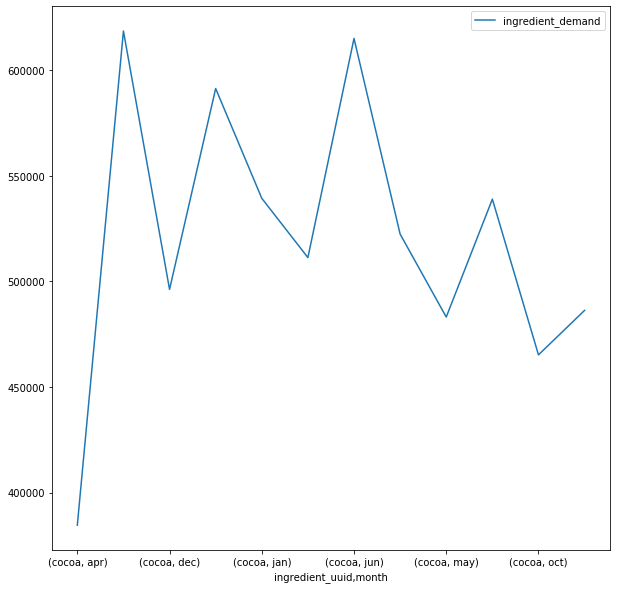

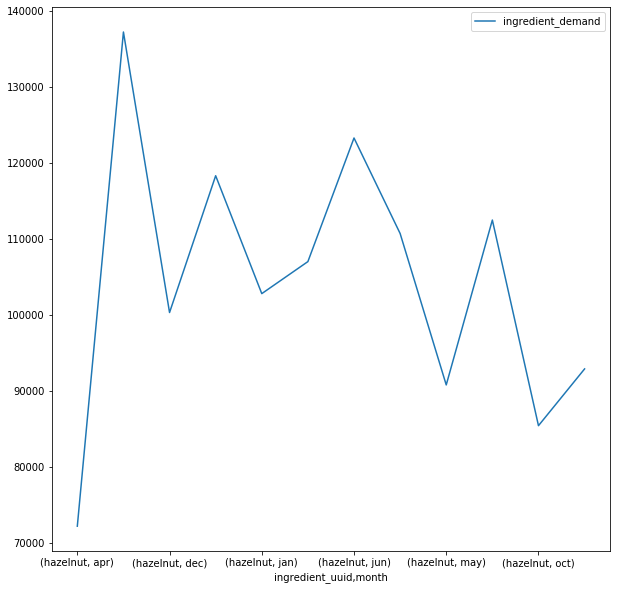

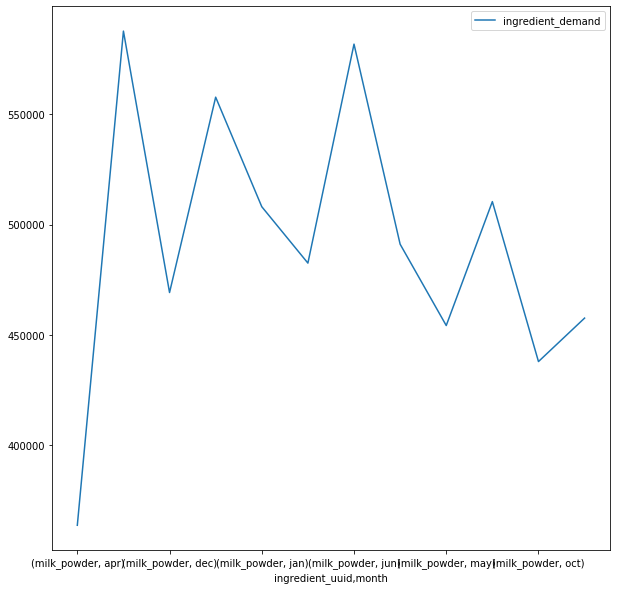

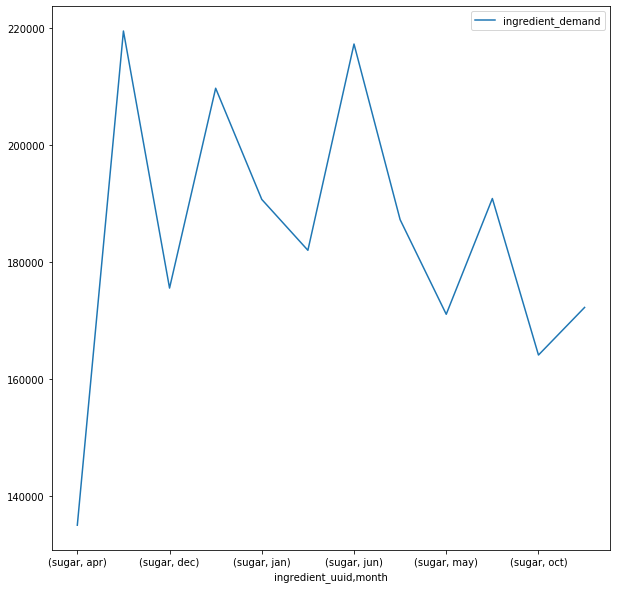

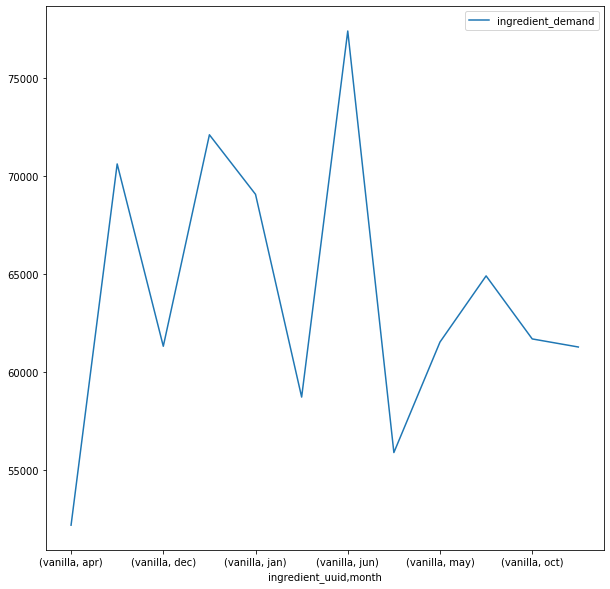

In [37]:
monthly_ingredient_demand.groupby('ingredient_uuid').plot(figsize=(10,10))

In [38]:
ingredient_demand.merge(cheapest_supplier, on='ingredient_uuid')
ingredient_demand['ingredient_demand'] = ingredient_demand['demand']*ingredient_demand['qty']
ingredient_demand

,rec_id,month,demand,ingredient_uuid,cost_to_process,time_to_process,qty,ingredient_demand
0,1,jan,16443,cocoa,0.20,120,13,213759
1,1,jan,16443,milk_powder,0.03,110,12,197316
2,1,jan,16443,hazelnut,0.08,45,4,65772
3,1,jan,16443,sugar,0.40,80,5,82215
4,1,feb,18943,cocoa,0.20,120,13,246259
...,...,...,...,...,...,...,...,...
151,3,dec,13065,hazelnut,0.08,45,3,39195
152,3,dec,13065,vanilla,0.10,34,2,26130
153,3,dec,13065,cocoa,0.20,120,12,156780
154,3,dec,13065,milk_powder,0.03,11,12,156780


In [39]:
demand_by_supply = ingredient_demand.merge(cheapest_supplier, on='ingredient_uuid')
demand_by_supply['ingredient_cost'] = demand_by_supply['ingredient_demand']*demand_by_supply['cost_per_unit']
demand_by_supply

,rec_id,month,demand,ingredient_uuid,cost_to_process,time_to_process,qty,ingredient_demand,supp_id,cost_per_unit,unit_name,country_of_origin,total_tax_per_unit,time_to_deliver,ingredient_cost
0,1,jan,16443,cocoa,0.2,120,13,213759,acme_inc,2370.0,tonne,indonesia,14,12,506608830.0
1,1,feb,18943,cocoa,0.2,120,13,246259,acme_inc,2370.0,tonne,indonesia,14,12,583633830.0
2,1,mar,19727,cocoa,0.2,120,13,256451,acme_inc,2370.0,tonne,indonesia,14,12,607788870.0
3,1,apr,10368,cocoa,0.2,120,13,134784,acme_inc,2370.0,tonne,indonesia,14,12,319438080.0
4,1,may,15125,cocoa,0.2,120,13,196625,acme_inc,2370.0,tonne,indonesia,14,12,466001250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,3,aug,19101,vanilla,0.1,34,2,38202,acme_inc,185.0,tonne,madagascar,3,12,7067370.0
152,3,sep,10577,vanilla,0.1,34,2,21154,acme_inc,185.0,tonne,madagascar,3,12,3913490.0
153,3,oct,10309,vanilla,0.1,34,2,20618,acme_inc,185.0,tonne,madagascar,3,12,3814330.0
154,3,nov,15003,vanilla,0.1,34,2,30006,acme_inc,185.0,tonne,madagascar,3,12,5551110.0


Work out total cost per unit to product


In [40]:
demand_by_supply.groupby('rec_id')['ingredient_cost'].sum()

rec_id
1    1.537022e+10
2    9.932093e+09
3    1.136516e+10
Name: ingredient_cost, dtype: float64

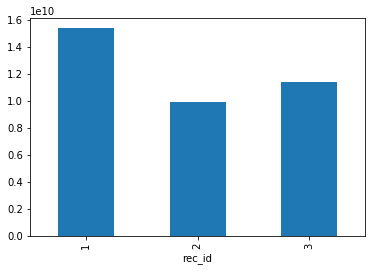

In [41]:
demand_by_supply.groupby('rec_id')['ingredient_cost'].sum().plot.bar()

(Homework) work out how to find the total cost of goods needed for each producer country.


In [42]:
ingredient_demand.merge(cheapest_supplier, on="ingredient_uuid").groupby('country_of_origin').sum()

,rec_id,demand,cost_to_process,time_to_process,qty,ingredient_demand,cost_per_unit,total_tax_per_unit,time_to_deliver
country_of_origin,,,,,,,,,
brazil,72,504586,14.40,2880,156,2215897,16452.0,180,324
indonesia,72,504586,7.20,4320,444,6252585,85320.0,504,432
madagascar,60,307033,2.40,816,60,766532,4440.0,72,288
switzerland,72,504586,1.08,2772,420,5902566,112320.0,0,72
usa,48,352120,1.92,1080,84,1253913,43608.0,288,192


(Homework) work out how to find the total tax, using the cheapest supplier for each ingredient, to create 1000 of each recipe.

In [43]:
q = ingredient_demand.merge(cheapest_supplier, on="ingredient_uuid").groupby('ingredient_uuid').sum()
q[['total_tax_per_unit']]

,total_tax_per_unit
ingredient_uuid,
cocoa,504
hazelnut,288
milk_powder,0
sugar,180
vanilla,72


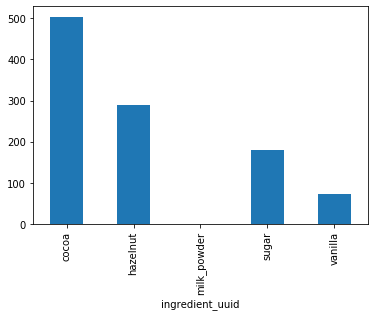

In [44]:
q['total_tax_per_unit'].plot.bar(x = "ingredient_uuid", y="total_tax_per_unit")

In [45]:
q['total_cost'] = q['ingredient_demand']*q['cost_per_unit'] + q['ingredient_demand']*q['total_tax_per_unit']
q

,rec_id,demand,cost_to_process,time_to_process,qty,ingredient_demand,cost_per_unit,total_tax_per_unit,time_to_deliver,total_cost
ingredient_uuid,,,,,,,,,,
cocoa,72,504586,7.20,4320,444,6252585,85320.0,504,432,5.366219e+11
hazelnut,48,352120,1.92,1080,84,1253913,43608.0,288,192,5.504177e+10
milk_powder,72,504586,1.08,2772,420,5902566,112320.0,0,72,6.629762e+11
sugar,72,504586,14.40,2880,156,2215897,16452.0,180,324,3.685480e+10
vanilla,60,307033,2.40,816,60,766532,4440.0,72,288,3.458592e+09


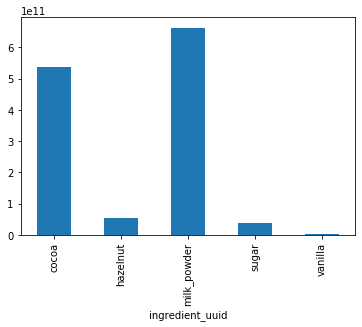

In [46]:
q['total_cost'].plot.bar()

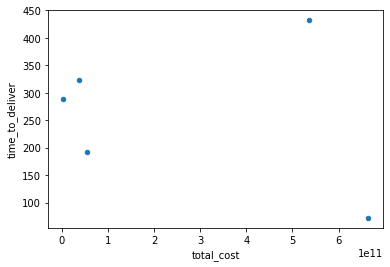

In [47]:
q[['total_cost', 'time_to_deliver']].plot.scatter(x='total_cost', y='time_to_deliver')

In [48]:
q = ingredient_demand.merge(cheapest_supplier, on="ingredient_uuid").groupby('ingredient_uuid')[['total_tax_per_unit']].sum()
q

,total_tax_per_unit
ingredient_uuid,
cocoa,504
hazelnut,288
milk_powder,0
sugar,180
vanilla,72


In [49]:
#Day 5

In [50]:
from random import randint
import numpy as np

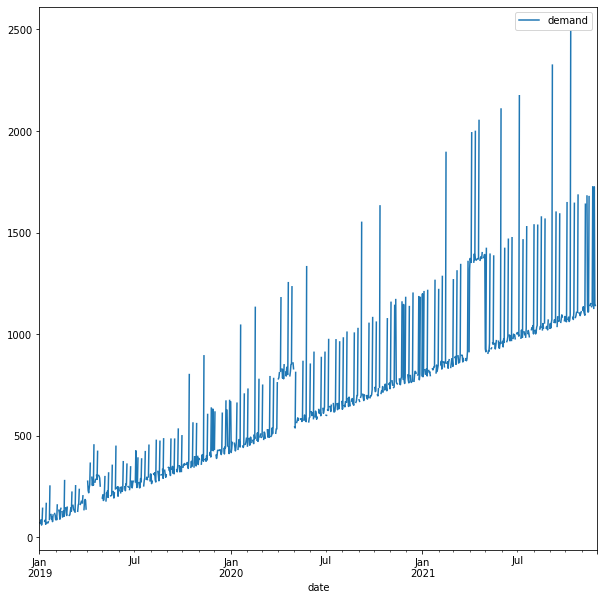

In [76]:
df = pd.read_csv("./data/demand_trend.csv", index_col=0)

df['date'] = pd.to_datetime(df['date'])
q = df[ ['date', 'demand'] ]
q.plot(x='date', y='demand', figsize=(10,10))

In [78]:
q

,date,demand
0,2019-01-01,NaN
1,2019-01-02,71.0
2,2019-01-03,70.0
3,2019-01-04,86.0
4,2019-01-05,60.0
...,...,...
1061,2021-11-27,1141.0
1062,2021-11-28,NaN
1063,2021-11-29,1738.5
1064,2021-11-30,NaN


In [71]:
q.dropna()

,date,demand
1,2019-01-02,71.0
2,2019-01-03,70.0
3,2019-01-04,86.0
4,2019-01-05,60.0
5,2019-01-06,74.0
...,...,...
1059,2021-11-25,1725.0
1060,2021-11-26,1150.0
1061,2021-11-27,1141.0
1063,2021-11-29,1738.5


In [72]:
df.fillna( df['demand'].mean() )

,date,demand,day_of_year,week_of_year,day_of_week,is_month_start,month,holiday
0,2019-01-01,696.522811,1,1,1,True,1,True
1,2019-01-02,71.000000,2,1,2,False,1,False
2,2019-01-03,70.000000,3,1,3,False,1,False
3,2019-01-04,86.000000,4,1,4,False,1,False
4,2019-01-05,60.000000,5,1,5,False,1,False
...,...,...,...,...,...,...,...,...
1061,2021-11-27,1141.000000,331,47,5,False,11,False
1062,2021-11-28,696.522811,332,47,6,False,11,False
1063,2021-11-29,1738.500000,333,48,0,False,11,False
1064,2021-11-30,696.522811,334,48,1,False,11,False


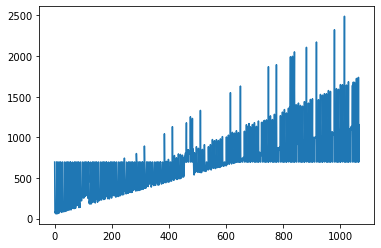

In [88]:
df.fillna( df['demand'].mean() )['demand'].plot()

In [84]:
df.fillna( method='ffill' )

,date,demand,day_of_year,week_of_year,day_of_week,is_month_start,month,holiday
0,2019-01-01,NaN,1,1,1,True,1,True
1,2019-01-02,71.0,2,1,2,False,1,False
2,2019-01-03,70.0,3,1,3,False,1,False
3,2019-01-04,86.0,4,1,4,False,1,False
4,2019-01-05,60.0,5,1,5,False,1,False
...,...,...,...,...,...,...,...,...
1061,2021-11-27,1141.0,331,47,5,False,11,False
1062,2021-11-28,1141.0,332,47,6,False,11,False
1063,2021-11-29,1738.5,333,48,0,False,11,False
1064,2021-11-30,1738.5,334,48,1,False,11,False


In [82]:
df.fillna( method='bfill' )

,date,demand,day_of_year,week_of_year,day_of_week,is_month_start,month,holiday
0,2019-01-01,71.0,1,1,1,True,1,True
1,2019-01-02,71.0,2,1,2,False,1,False
2,2019-01-03,70.0,3,1,3,False,1,False
3,2019-01-04,86.0,4,1,4,False,1,False
4,2019-01-05,60.0,5,1,5,False,1,False
...,...,...,...,...,...,...,...,...
1061,2021-11-27,1141.0,331,47,5,False,11,False
1062,2021-11-28,1738.5,332,47,6,False,11,False
1063,2021-11-29,1738.5,333,48,0,False,11,False
1064,2021-11-30,1156.0,334,48,1,False,11,False


In [89]:
df.fillna( method='ffill' ).fillna( method='bfill' )

,date,demand,day_of_year,week_of_year,day_of_week,is_month_start,month,holiday
0,2019-01-01,71.0,1,1,1,True,1,True
1,2019-01-02,71.0,2,1,2,False,1,False
2,2019-01-03,70.0,3,1,3,False,1,False
3,2019-01-04,86.0,4,1,4,False,1,False
4,2019-01-05,60.0,5,1,5,False,1,False
...,...,...,...,...,...,...,...,...
1061,2021-11-27,1141.0,331,47,5,False,11,False
1062,2021-11-28,1141.0,332,47,6,False,11,False
1063,2021-11-29,1738.5,333,48,0,False,11,False
1064,2021-11-30,1738.5,334,48,1,False,11,False


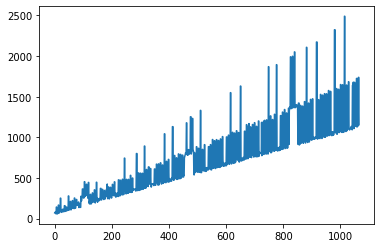

In [91]:
df.fillna( method='ffill' ).fillna( method='bfill' )['demand'].plot()

In [80]:
df['day_of_year'] = df['date'].apply( lambda x : x.dayofyear )

df['week_of_year'] = df['date'].apply( lambda x : x.weekofyear )

df['day_of_week'] = df['date'].apply( lambda x : x.day_of_week )

df['is_month_start'] = df['date'].apply( lambda x : x.is_month_start )

df['month'] = df['date'].apply( lambda x : x.month )

In [81]:
df

,date,demand,day_of_year,week_of_year,day_of_week,is_month_start,month,holiday
0,2019-01-01,NaN,1,1,1,True,1,True
1,2019-01-02,71.0,2,1,2,False,1,False
2,2019-01-03,70.0,3,1,3,False,1,False
3,2019-01-04,86.0,4,1,4,False,1,False
4,2019-01-05,60.0,5,1,5,False,1,False
...,...,...,...,...,...,...,...,...
1061,2021-11-27,1141.0,331,47,5,False,11,False
1062,2021-11-28,NaN,332,47,6,False,11,False
1063,2021-11-29,1738.5,333,48,0,False,11,False
1064,2021-11-30,NaN,334,48,1,False,11,False


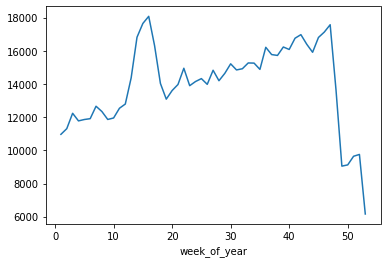

In [94]:
df.fillna(df['demand'].mean()).groupby( 'week_of_year' )['demand'].sum().plot()

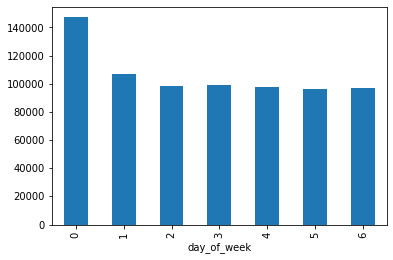

In [95]:
df.fillna(df['demand'].mean()).groupby( 'day_of_week' )['demand'].sum().plot.bar()

In [ ]:
#homework : create a bar chart grouping all the data by month. Is any one month significantly higher than the others

In [ ]:
#homework (research needed) : use diff + shift functions to work out rate of demand growth month/month and year / year
#take care to notice what happens with nan

In [92]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [113]:
cal = calendar()
holidays = cal.holidays(start=df['date'].min(), end=df['date'].max())

df['holiday'] = df['date'].isin(holidays)

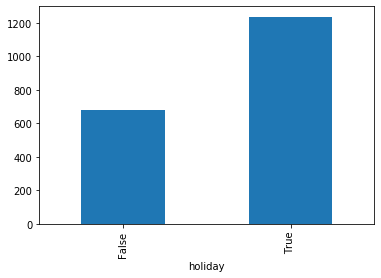

In [111]:
df.groupby('holiday')['demand'].mean().plot.bar()

In [102]:
df['diff_day'] = df.fillna( method='ffill' ).fillna( method='bfill' )['demand'].diff(periods=1)


In [103]:
df.fillna( method='ffill' ).fillna( method='bfill' )['demand'].diff(periods=10)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
1061      0.0
1062     -9.0
1063    588.5
1064    603.5
1065     15.0
Name: demand, Length: 1066, dtype: float64

In [101]:
df

,date,demand,day_of_year,week_of_year,day_of_week,is_month_start,month,holiday,diff_day
0,2019-01-01,NaN,1,1,1,True,1,True,NaN
1,2019-01-02,71.0,2,1,2,False,1,False,NaN
2,2019-01-03,70.0,3,1,3,False,1,False,NaN
3,2019-01-04,86.0,4,1,4,False,1,False,NaN
4,2019-01-05,60.0,5,1,5,False,1,False,NaN
...,...,...,...,...,...,...,...,...,...
1061,2021-11-27,1141.0,331,47,5,False,11,False,0.0
1062,2021-11-28,NaN,332,47,6,False,11,False,-9.0
1063,2021-11-29,1738.5,333,48,0,False,11,False,588.5
1064,2021-11-30,NaN,334,48,1,False,11,False,603.5


In [108]:
df['demand_shift'] = df['demand'].shift(2)
df

,date,demand,day_of_year,week_of_year,day_of_week,is_month_start,month,holiday,diff_day,demand_shift
0,2019-01-01,NaN,1,1,1,True,1,True,NaN,NaN
1,2019-01-02,71.0,2,1,2,False,1,False,0.0,NaN
2,2019-01-03,70.0,3,1,3,False,1,False,-1.0,NaN
3,2019-01-04,86.0,4,1,4,False,1,False,16.0,71.0
4,2019-01-05,60.0,5,1,5,False,1,False,-26.0,70.0
...,...,...,...,...,...,...,...,...,...,...
1061,2021-11-27,1141.0,331,47,5,False,11,False,-9.0,1725.0
1062,2021-11-28,NaN,332,47,6,False,11,False,0.0,1150.0
1063,2021-11-29,1738.5,333,48,0,False,11,False,597.5,1141.0
1064,2021-11-30,NaN,334,48,1,False,11,False,0.0,NaN


In [110]:
df['dod_demand'] = df['demand'] / df['demand_shift']
df

,date,demand,day_of_year,week_of_year,day_of_week,is_month_start,month,holiday,diff_day,demand_shift,dod_demand
0,2019-01-01,NaN,1,1,1,True,1,True,NaN,NaN,NaN
1,2019-01-02,71.0,2,1,2,False,1,False,0.0,NaN,NaN
2,2019-01-03,70.0,3,1,3,False,1,False,-1.0,NaN,NaN
3,2019-01-04,86.0,4,1,4,False,1,False,16.0,71.0,1.211268
4,2019-01-05,60.0,5,1,5,False,1,False,-26.0,70.0,0.857143
...,...,...,...,...,...,...,...,...,...,...,...
1061,2021-11-27,1141.0,331,47,5,False,11,False,-9.0,1725.0,0.661449
1062,2021-11-28,NaN,332,47,6,False,11,False,0.0,1150.0,NaN
1063,2021-11-29,1738.5,333,48,0,False,11,False,597.5,1141.0,1.523663
1064,2021-11-30,NaN,334,48,1,False,11,False,0.0,NaN,NaN
